# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the 
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [36]:
url = r'C:\Users\NINGMER\Desktop\abc.tsv'
    
chipo = pd.read_csv(url, sep = '\t',encoding = 'utf-8')

### Step 4. See the first 10 entries

In [77]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


### Step 5. Create a histogram of the top 5 items bought
### 创建购买的前5项的直方图

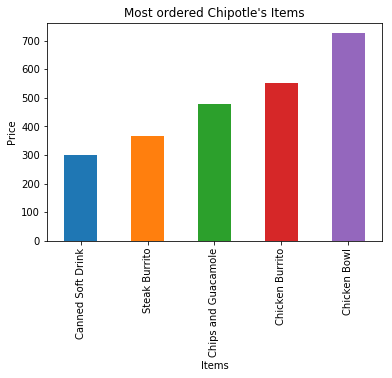

In [38]:
# get the Series of the names
x = chipo.item_name

# use the Counter class from collections to create a dictionary with keys(text) and frequency
letter_counts = Counter(x)

# convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(letter_counts, orient='index')

# sort the values from the top to the least value and slice the first 5 items
df = df[0].sort_values(ascending = True)[45:50]

# create the plot
df.plot(kind='bar')

# Set the title and labels
plt.xlabel('Items')
plt.ylabel('Price')
plt.title('Most ordered Chipotle\'s Items')

# show the plot
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
### 创建一个散点图，显示每个订单价格下订单的商品数量
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis
### 提示:价格应该在x轴，商品应该在y轴

In [42]:
orders = chipo.groupby('order_id').sum()
orders

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
6,2,17.50
7,2,15.70
8,2,10.88
9,3,10.67


(0, 36.7178857951459)

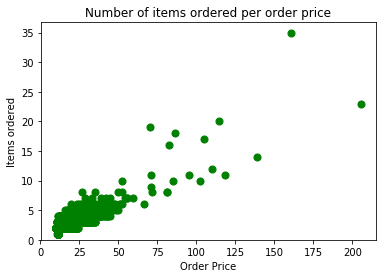

In [39]:
# create a list of prices
chipo.item_price = [float(value[1:-1]) for value in chipo.item_price] # strip the dollar sign and trailing space

# then groupby the orders and sum
orders = chipo.groupby('order_id').sum()

# creates the scatterplot
# plt.scatter(orders.quantity, orders.item_price, s = 50, c = 'green')
plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'green')

# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

### BONUS: Create a question and a graph to answer your own question.

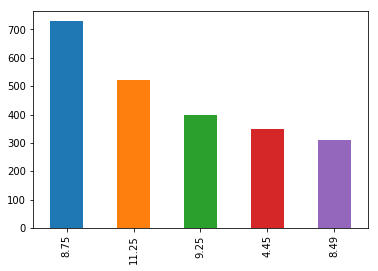

In [70]:
df = chipo.item_price.value_counts().head().plot.bar()
df

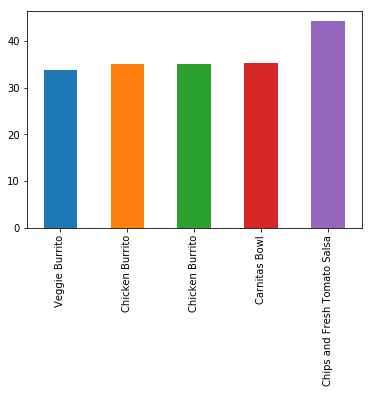

In [114]:
a = chipo.drop_duplicates(subset=['item_name'])
df1 = chipo.sort_values('item_price').tail(5)
a = df1.item_name.values
y = df1.item_price.values
#plt.bar(a,y)
c = pd.Series(y,index=a)
c.plot.bar()

In [86]:
df1

,order_id,quantity,item_name,choice_description,item_price
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00
3480,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25


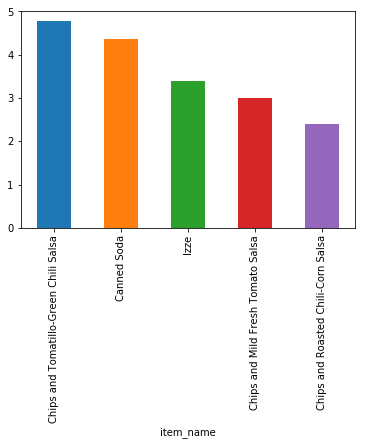

In [123]:
df2 = chipo.groupby('item_name').max().sort_values('item_price',ascending = False).tail()
df2['item_price'].plot.bar()

In [118]:
df2

,order_id,quantity,choice_description,item_price
item_name,,,,
Chips and Tomatillo-Green Chili Salsa,1604,2,NaN,4.78
Canned Soda,1621,4,[Sprite],4.36
Izze,1468,1,[Grapefruit],3.39
Chips and Mild Fresh Tomato Salsa,279,1,NaN,3.00
Chips and Roasted Chili-Corn Salsa,1565,1,NaN,2.39
